# Théorie des réseaux de Neurones artificiels

#### Requirements 
```python
# Installer les bibliotheques necessaires
!pip install numpy matplotlib pytorch
```
### **TODO**

### Les bases du Machine Learning et du Deep Learning
- Le **machine learning** est un domaine de l'intelligence artificielle qui consiste à programmer une machine pour que celle-ci apprenne à réaliser des tâches en étudiant des exemples (données) de ces tâches.  
  Il consiste à développer des **modèles** en se servant d'un algorithme d'**optimisation** pour **minimiser les erreurs** entre le **modèle** et nos **données**. 
- Le **deep learning** est un sous-ensemble du machine learning qui développe des **réseaux de neurones artificiels**. Il est souvent utilisé pour traiter des données plus complexes comme des images.

## 1. Classification binaire (Le perceptron)
Il s'agit d'un modèle qui permet de séparer linéairement 2 classes de points : Imaginons qu'on ait un ensemble de plantes qui peuvent être toxiques (```y=1```) ou non-toxique (```y=0```).
En mesurant certains attributs $x_1$ : la longueur des feuilles et $x_2$ : leur largeur, on observe que les 2 classes de plantes sont linéairement séparables. 

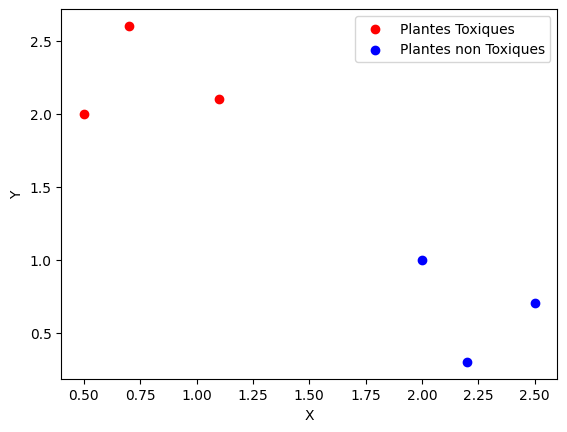

In [1]:
import matplotlib.pyplot as plt
import numpy as np

toxiques = np.array([[0.5, 2], [1.1, 2.1], [0.7, 2.6]])
non_toxiques = np.array([[2, 1], [2.5, 0.7], [2.2, 0.3]])

plt.scatter(toxiques[:, 0], toxiques[:, 1], color='red', label='Plantes Toxiques')
plt.scatter(non_toxiques[:, 0], non_toxiques[:, 1], color='blue', label='Plantes non Toxiques')


plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

En observant le graphique ci dessus, on remarque que ces 2 classes de plantes sont linéairement séparables i.e. il existe une droite linéaire qui peut séparer ces 2 groupes de points. 

### 1.1. Frontière de décision

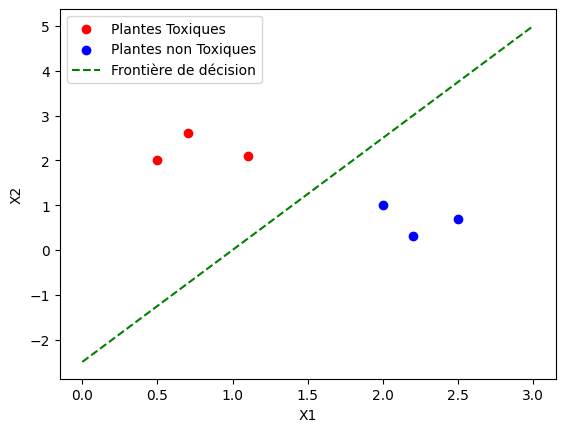

In [2]:
plt.scatter(toxiques[:, 0], toxiques[:, 1], color='red', label='Plantes Toxiques')
plt.scatter(non_toxiques[:, 0], non_toxiques[:, 1], color='blue', label='Plantes non Toxiques')

x_vals = np.linspace(0, 3, 100)
y_vals = (1 - x_vals) / -0.4  #Exemple d'equation de frontiere de decision
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Frontière de décision')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


La frontière de décision permet de séparer les 2 classes : si une plante se trouve à sa gauche, elle sera considérée comme toxique ; si une plante se trouve à sa droite, elle sera considérée comme non toxique.  
Ainsi, notre but est de <u>**déterminer l'équation de cette droite**</u>. 
Pour ce faire : on va développer un modèle linéaire qui consiste à fournir 2 entrées $x_1$ multipliée par un ppids $w_1$ et $x_2$ multipliée par un poids $w_2$, on fait également passer un biais $b$ ce qui nous donne une fonction $\boxed{z(x_1, x_2) = w_1 x_1 + w_2 x_2 + b }$.  
On remarque alors que pour $x_1$ , $x_2$ donnés : si $ z < 0$ la plante n'est pas toxique et si $ z>0$ la plante est toxique.  
**La frontière de décision** correspond alors à $ \boxed{z(x_1,x_2) = 0}$


C'est ainsi que fonctionne le **perceptron**, le premier neurone du Deep Learning. Afin d'améliorer ce modèle, on va accompagner chaque prédiction d'une probabilité. En effet, plus une plante est loin de la frontière de décision, plus il est probable qu'elle appartienne bien à sa classe. Pour ce faire, nous allons introduire une fonction appelée **d'activation** qui calcule cette probabilité. L'exemple le plus courant est la **fonction sigmoïde** (**logistique**) : $\boxed{a(z) = \frac{1}{1+e^{-z}}}$   
Cette dernière calcule la probabilité qu'une plante appartienne à la classe 1 (i.e est toxique).  
On peut facilement démontrer que la probabilité qu'une plante appartienne à la classe y est donnée par la formule suivante : $\boxed{ P(Y = y) = a(z)^y \cdot (1 - a(z))^{1 - y} }$

En résumé, notre neurone est constituée de z suivi de a, il prend en entrée $x_1, x_2$ et les poids $w_1, w_2$ et nous retourne une probabilité $a(z) =y_{pred}$ suivant une loi de bernoulli.  


Maintant notre but va être de régler les paramètres $w_1, w_2$ et $b$ afin d'obtenir le meilleur modèle possible i.e. celui qui réduit au mieux les erreurs entre $y_{pred}$ et les vraies données $y$. Pour ce faire : nous allons introduire une fonction **coût** qui permet de mesurer ces erreurs.


### 1.2. Fonction coût : Maximum de vraissemblance



La vraissemblance représente la plausibilité du modèle vis-à-vis des données réelles.  
Pour calculer la vraissemblance de notre modèle, nous allons faire le produit des probabilités sur nos données réelles $y_i$ ce qui nous rammène à la formule suivante : $\prod_{i=1}^{m} P(Y=y_i) = \prod_{i=1}^{m} {a_{i}}^y_i \cdot {(1 - a_{i})}^{1 - y_i} $.  
Notons un problème : plus on a de nombres, plus ce produit se rapprochera de 0. C'est pour cela que nous allons convertir ce produit en une somme de **log**. La formule obtenue est donc $\sum_{i=1}^{m} y_i \cdot \log(a_i) + {(1 - y_i)}\cdot \log( 1 - a_i)$. 




Notre but est donc de **maximiser** cette somme : ceci revient à minimiser l'opposé de cette somme. On multiplie enfin par un facteur $\frac{1}{m}$ afin de normaliser le résultat.  La fonction coût que nous allons chercher à **minimiser** est la fonction **logloss** donnée par la formule $ \boxed{L = -\frac{1}{m}\sum_{i=1}^{m} y_i \cdot \log(a_i) + {(1 - y_i)}\cdot \log( 1 - a_i)}$.                 
Pour la minimiser, nous allons utiliser l'algorithme de la **descente de gradient**

### 1.3. Algorithme de la descente de gradient


Cet algorithme cherche à ajuster les paramètres W = $(w_1, w_2)$ et b, afin de minimiser le **logloss**. Afin d'étudier les variations de ce logloss, nous avons besoin de calculer son gradient. Comme notre fonction logloss est convexe, il existe donc un seul minimum.  
On applique la formule suivante : $\boxed{W_{t+1} = W_t - \alpha \frac{\partial L}{\partial W_t}}$ et $\boxed{b_{t+1} = b_t - \alpha \frac{\partial L}{\partial b_t}}$.   avec $\alpha$ un pas d'apprentissage positif.  
Si le gradient est négatif (resp. positif), on fera augmenter (resp. diminuer) la valeur de W. En bouclant à l'infini, on tombera sur notre minimum global.

Passons au calcul des gradients :  
- $\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial w1} = \frac{-1}{m} \sum (\frac{y}{a} - \frac{1-y}{1-a}) a (1-a) x_1 = - \frac{1}{m} \sum_{i = 1}^m (y_i - a_i) (x_1)_i$
- $\frac{\partial L}{\partial w_1} = - \frac{1}{m} \sum_{i = 1}^m (y_i - a_i) (x_2)_i $ (même raisonnement)
- $\frac{\partial L}{\partial w_1} = - \frac{1}{m} \sum_{i = 1}^m (y_i - a_i) $ (même raisonnement)

## 2. Implémentation 
On est maintenant capables de coder notre 1er neurone artificiel !

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Nous allons créer un nuage de points de 2 classes.

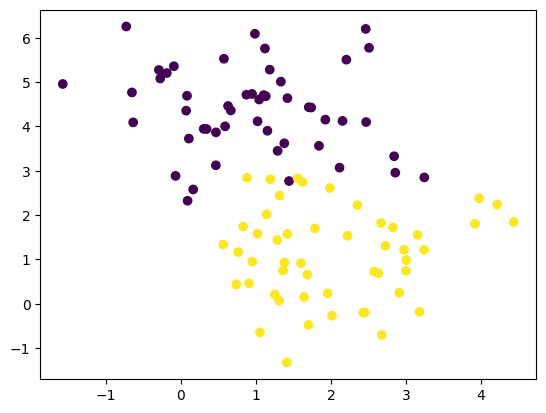

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

#violet classe 0 et jaune classe 1 

In [5]:
def initialisation(X): #avoir W et b
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

def modele(X, W, b): # Z = X.W + b et A = 1/(1 + e^(-Z)) 
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def log_loss(A, y): #notre fonction cout logloss
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

def gradients(A, X, y): #les gradients qu'on a calcule
    dW = 1 / len(y) * np.dot(X.T, A - y) #on trouve la formule en developpant  grad = 1/m (sum_i (a_i - y_i) x_1_i   = 1/m (x_1_1 x_1_2 ... x_1_m.  * [ (a_1 - (y_1  ]
    #                                                                                      sum_i (a_i-y_i) x_2_i  )         x_2_1 x_2_2 ... x_2_m )     a_2     y_2
    #                                                                                                                                                   ...     ...
    #                                                                                                                                                   a_m)    y_m)
    db = 1 / len(y) * np.sum(A - y) 
    return (dW, db)

def descente(dW, db, W, b, alpha): # dW et db etant les gradients
    W = W - alpha * dW
    b = b - alpha * db
    return (W, b)



In [6]:
lst_cout = []

def premier_neurone_artificiel(X, y, alpha = 0.1, N=1000):
    W,b = initialisation(X)
    
    for i in range(N):
        A = modele(X,W,b)
        cout = log_loss(A,y)
        lst_cout.append(cout)
        dW, db = gradients(A,X,y)
        W,b = descente(dW, db, W, b, alpha)
    return (W,b)

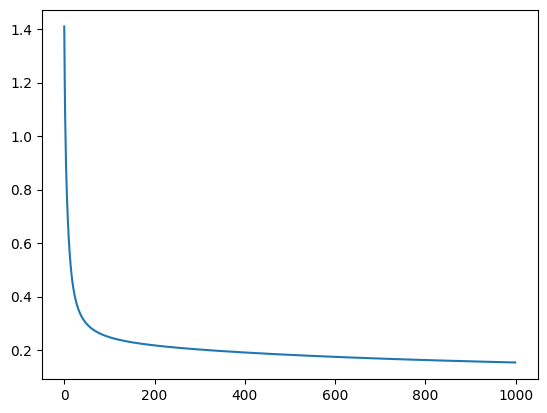

In [7]:
W,b = premier_neurone_artificiel(X, y)
plt.plot(lst_cout)
plt.show()

On voit bien d'après le graphique précédent que notre modèle a bien appris : en effet, les erreurs diminuent !

Maintenant, ce modèle entraîne on peut l'utiliser pour effectuer des prédictions i.e. si on nous donne les caractéristiques d'une plante, on peut prédire sa classe. Pour ce faire nous allons définir une fonction predire qui retourne True si la plante est dans la classe 1 et False sinon.

In [8]:
def predict(X, W, b):
    A = modele(X, W, b)
    return A >= 0.5

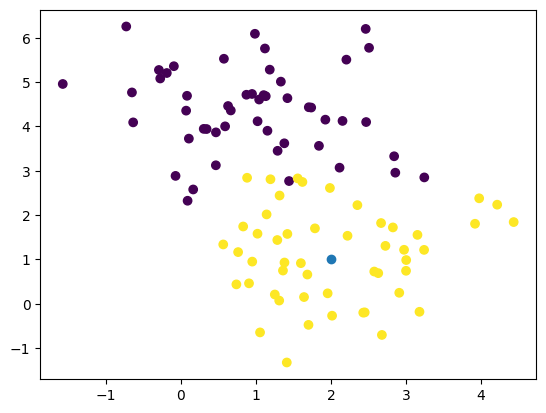

In [9]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
nv_plante = np.array([2,1])
plt.scatter(nv_plante[0], nv_plante[1])
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

il est clair que la plante en bleu est dans la classe 1 verifions cela avec notre fonction i.e renvoie-t-elle True?

In [10]:
predict(nv_plante, W, b) #renvoie bien True !

array([ True])

Visualisons la frontière de décision i.e. la droite qui vérifie $w_1x_1 +w_2x_2 +b = 0$

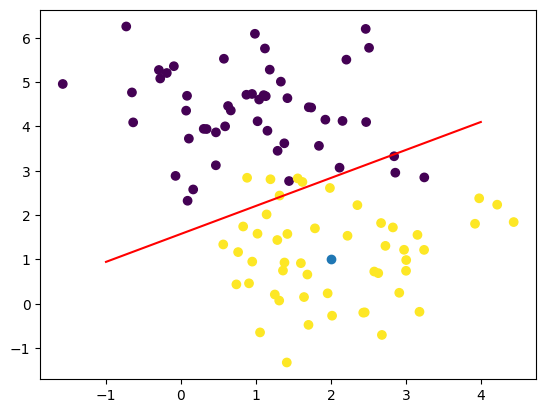

In [15]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
nv_plante = np.array([2,1])
plt.scatter(nv_plante[0], nv_plante[1])
plt.scatter(X[:,0], X[:, 1], c=y)

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]
plt.plot(x1, x2, color = "red")

plt.show()

Notre modèle fait donc 7 erreurs / 100

## 3. Réseaux de neurones

### 3.1 Définition
L’idée principale est de combiner de nombreux neurones pour modéliser des relations complexes entre les données et de résoudre des problèmes plus complexe que la regression logistique (car linéaire). Ainsi, pour résoudre ceci on passe à une fonction polynomiale. À la place, nous allons implémenter des réseaux de neurones artificiels en empilant plusieurs couches de neurones.

Nous avons précedemment vu le fonctionnement d'un neurone unique, étalons cela par récurrence:
- pour créer le modèle : soit $w_{ij}$ le paramètre associé au neurone `i` et provenant provenant de l'entrée `j`, `c` le numéro de la couche sur laquelle on travaille alors $z_i^c = \sum_j w_{ij}a_j^{c-1} + b_i$ qu'on peut vectoriser : $Z^c = W^c.X+b$ avec pour la colonne `i` de $Z^c$, les paramètre provenant de l'entrée `i`. On calcule ensuite l'activation $A^c = \frac{1}{1+e^{-Z^c}}$


### 3.2 Formules de Forward Propagation et Back Propagation

#### Forward Propagation

La **forward propagation** (propagation avant) consiste à calculer la sortie du réseau à partir des entrées en passant par chaque couche. 
Dans un réseau à plusieurs couches, ce processus est répété couche par couche, la sortie d'une couche servant d'entrée à la suivante.

### Back Propagation

La **back propagation** (rétropropagation) est l’algorithme utilisé pour ajuster les poids et les biais du réseau afin de minimiser la fonction de coût. Le principe repose sur l’utilisation de la règle de la chaîne pour calculer les gradients.

Calculons les gradients. Pour simplifier les calculs on prouvera les formules pour c = 2 et on généralisera après :
- $\frac{\partial L}{\partial W^2} = \frac{\partial L}{\partial A^2}\frac{\partial A^2}{\partial Z^2}\frac{\partial Z^2}{\partial W^2} = dZ_2 \frac{\partial Z^2}{\partial W^2}$. avec $dZ_2 =  \frac{\partial L}{\partial A^2}\frac{\partial A^2}{\partial Z^2}$
  
-  $\frac{\partial L}{\partial b^2} = dZ_2 \frac{\partial Z^2}{\partial b}$

$\newline$

- $\frac{\partial L}{\partial W^1} = \frac{\partial L}{\partial A^2}\frac{\partial A^2}{\partial Z^2}\frac{\partial Z^2}{\partial W^{1}}\frac{\partial A^1}{\partial Z^1}\frac{\partial Z^1}{\partial W^1} = dZ_1 \frac{\partial Z^1}{\partial W^1} $
  
-  $\frac{\partial L}{\partial b^1}  = dZ_1\frac{\partial Z^1}{\partial b}$

  Calcul : $dZ_2 = \frac{1}{m} \sum A^2 - y$ on va supposer que $\boxed{dZ_2 =A^2 - y}$, on ajoutera le $ \frac{1}{m} \sum$ après afin d'avoir la bonne dimension ; $\frac{\partial Z^2}{\partial W^2 }= A^1 $ donc $\boxed{\frac{\partial L}{\partial W^2} = \frac{1}{m}dZ_2 {A^1}^{T} }$ (pour que le produit matriciel fonctionne on est obligés de passer à la transposée et le 1/m est donné dans le dZ_2 qu'on a négligé au début ; la somme étant incluse dans le produit matriciel) 
  et $\frac{\partial L}{\partial b^2} = dZ_2 . 1 = dZ_2$ or pour avoir la même dimension que b on est obligés de passer à $\boxed{\frac{\partial L}{\partial b^2} = \frac{1}{m} \sum_{colonnes} dZ_2}$

avec le même raisonnement, on trouve que $ \boxed{dZ_1 = {W^2}^T.dZ_2 A^1(1-A^1)} ; \boxed{\frac{\partial L}{\partial W^1} =\frac{1}{m} dZ_1 . X^T} ; \boxed{\frac{\partial L}{\partial b^1} = \frac{1}{m} \sum_{colonnes} dZ_1}$

